# Chapter 9. Tidy Data with tidyr

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Introduction

> *Happy families are all alike; every unhappy family is unhappy in its own way.*
>
> —Leo Tolstoy

> *Tidy datasets are all alike, but every messy dataset is messy in its own way.*
>
> —Hadley Wickham

> If you’d like to learn more about the underlying theory, you might enjoy the [*Tidy Data paper*](http://www.jstatsoft.org/v59/i10/paper) published in the *Journal of Statistical Software*.

> There are three interrelated rules which make a dataset tidy:
> - Each variable must have its own column.
> - Each observation must have its own row.
> - Each value must have its own cell.
>
> <img width="800" src="https://web.archive.org/web/20201228150013if_/https://www.oreilly.com/library/view/r-for-data/9781491910382/assets/rfds_0901.png" />

country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,3.72741
Afghanistan,2000,2666,20595360,12.94466
Brazil,1999,37737,172006362,21.93930
Brazil,2000,80488,174504898,46.12363
China,1999,212258,1272915272,16.67495
China,2000,213766,1280428583,16.69488


year,n
<int>,<int>
1999,250740
2000,296920


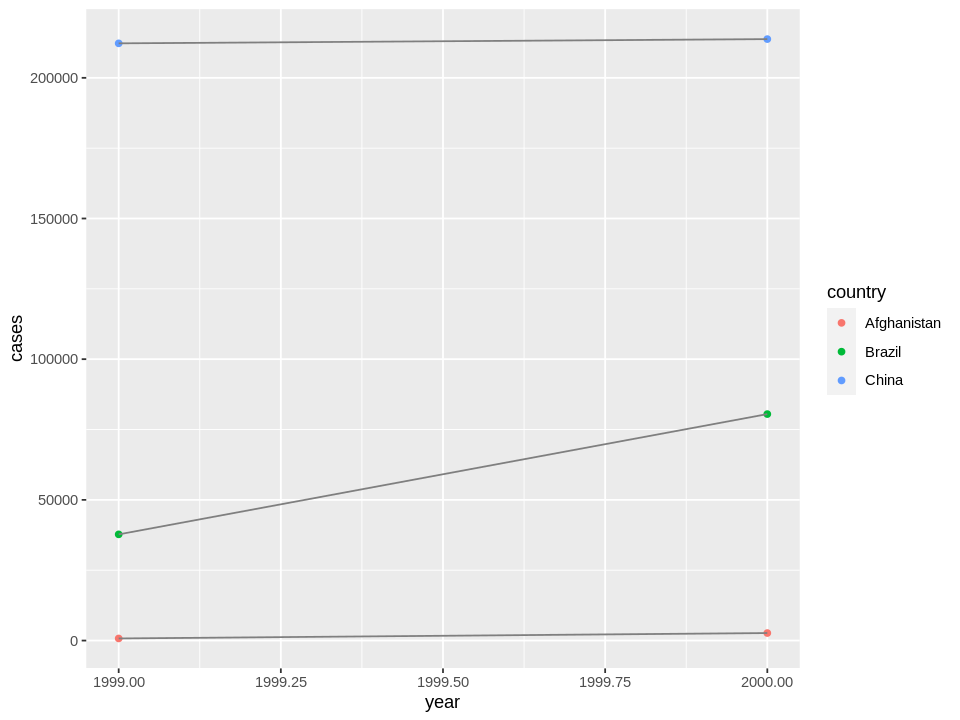

In [2]:
table1 %>% mutate(rate = cases / population * 100000)
table1 %>% count(year, wt = cases)

qplot(year, cases, color = country, data = table1) +
  geom_line(aes(group = country), colour = "grey50")

### Exercises

1. Using prose, describe how the variables and observations are organized in each of the sample tables.
1. Compute the rate for `table2`, and `table4a` + `table4b`. You will need to perform four operations:

    1. Extract the number of TB cases per country per year.
    1. Extract the matching population per country per year.
    1. Divide cases by population, and multiply by 10,000.
    1. Store back in the appropriate place.

    Which representation is easiest to work with? Which is hardest? Why?

1. Re-create the plot showing change in cases over time using `table2` instead of `table1`. What do you need to do first?

country,year,rate
<chr>,<int>,<dbl>
Afghanistan,1999,3.72741
Afghanistan,2000,12.94466
Brazil,1999,21.93930
Brazil,2000,46.12363
China,1999,16.67495
China,2000,16.69488


country,year,rate
<chr>,<dbl>,<dbl>
Afghanistan,1999,3.72741
Afghanistan,2000,12.94466
Brazil,1999,21.93930
Brazil,2000,46.12363
China,1999,16.67495
China,2000,16.69488


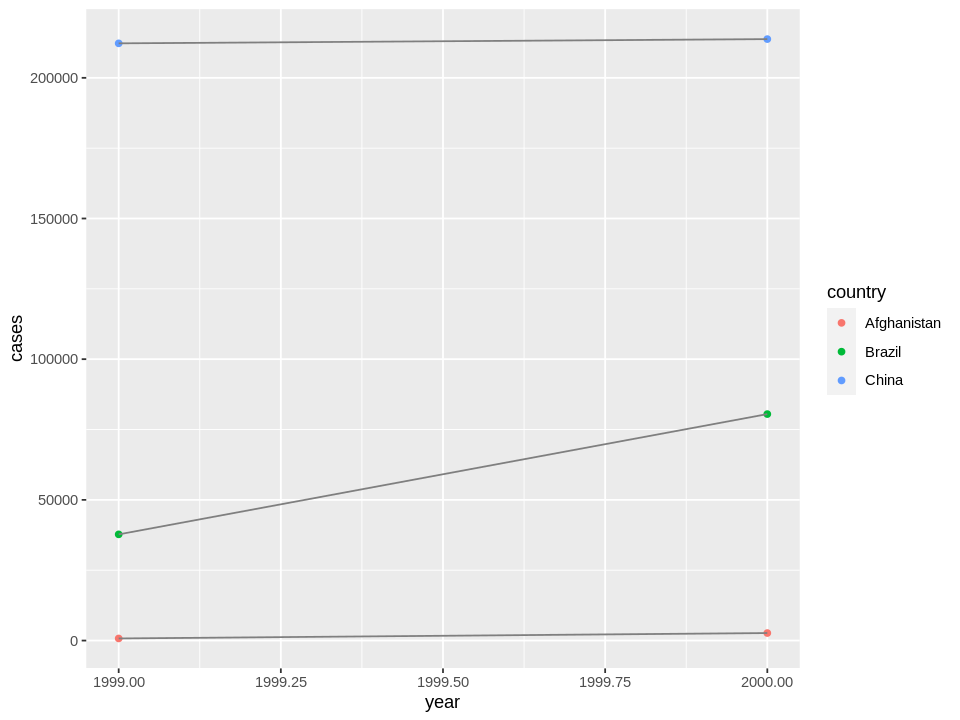

In [3]:
# 2.
table2 %>%
  arrange(type) %>%
  group_by(country, year) %>%
  summarise(
    rate = first(count) / last(count) * 100000,
    .groups = "drop"
  )

bind_rows(
  mutate(table4a, type = "cases"),
  mutate(table4b, type = "population")
) %>%
  arrange(type) %>%
  group_by(country) %>%
  summarise(
    year = c(1999, 2000),
    rate = c(
      first(`1999`) / last(`1999`) * 100000,
      first(`2000`) / last(`2000`) * 100000
    ),
    .groups = "drop"
  )

# 3. 
qplot(year, count, color = country, data = filter(table2, type == "cases")) +
  geom_line(aes(group = country), colour = "grey50") +
  ylab("cases") 

## Spreading and Gathering

> The principles of tidy data seem so obvious that you might wonder if you’ll ever encounter a dataset that isn’t tidy. Unfortunately, however, most data that you will encounter will be untidy. There are two main reasons:
> - Most people aren’t familiar with the principles of tidy data, and it’s hard to derive them yourself unless you spend a *lot* of time working with data.
> - Data is often organized to facilitate some use other than analysis. For example, data is often organized to make entry as easy as possible.

> - One variable might be spread across multiple columns.
> - One observation might be scattered across multiple rows.

### Gathering

> <img width="800" src="https://web.archive.org/web/20201228161146if_/https://www.oreilly.com/library/view/r-for-data/9781491910382/assets/rfds_0902.png" />

In [4]:
table4a
table4a %>% gather(year, cases, matches("\\d{4}"))
table4a %>% pivot_longer(matches("\\d{4}"), "year", values_to = "cases")

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


In [5]:
table4b
table4b %>% gather(year, population, matches("\\d{4}"))
table4b %>% pivot_longer(matches("\\d{4}"), "year", values_to = "population")

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


In [6]:
inner_join(
  pivot_longer(table4a, matches("\\d{4}"), "year", values_to = "cases"),
  pivot_longer(table4b, matches("\\d{4}"), "year", values_to = "population"),
  by = c("country", "year"),
)

country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Spreading

> <img width="800" src="https://web.archive.org/web/20201228161150if_/https://www.oreilly.com/library/view/r-for-data/9781491910382/assets/rfds_0903.png" />

In [7]:
table2
table2 %>% spread(type, count)
table2 %>% pivot_wider(names_from = type, values_from = count)

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Exercises

1. Why are `gather()` and `spread()` not perfectly symmetrical?

    Carefully consider the following example:

    ```r
    stocks <- tibble(
      year   = c(2015, 2015, 2016, 2016),
      half  = c(   1,    2,     1,    2),
      return = c(1.88, 0.59, 0.92, 0.17)
    )
    stocks %>%
      spread(year, return) %>%
      gather("year", "return", `2015`:`2016`)
    ```

    (Hint: look at the variable types and think about column *names*.)

    Both `spread()` and `gather()` have a `convert` argument. What does it do?

1. Why does this code fail?

    ```r
    table4a %>%
      gather(1999, 2000, key = "year", value = "cases")
    #> Error in eval(expr, envir, enclos):
    #> Position must be between 0 and n
    ```

1. Why does spreading this tibble fail? How could you add a new column to fix the problem?

    ```r
    people <- tribble(
      ~name,             ~key,    ~value,
      #-----------------|--------|------
      "Phillip Woods",   "age",       45,
      "Phillip Woods",   "height",   186,
      "Phillip Woods",   "age",       50,
      "Jessica Cordero", "age",       37,
      "Jessica Cordero", "height",   156
    )
    ```

1. Tidy this simple tibble. Do you need to spread or gather it? What are the variables?

    ```r
    preg <- tribble(
      ~pregnant, ~male, ~female,
      "yes",     NA,    10,
      "no",      20,    12
    )
    ```

In [8]:
# 1.
stocks <- tribble(
  ~year, ~half, ~return,
  2015, 1, 1.88,
  2015, 2, 0.59,
  2016, 1, 0.92,
  2016, 2, 0.17
)
stocks %>%
  spread(year, return) %>%
  gather(year, return, `2015`:`2016`)
stocks %>%
  spread(year, return) %>%
  gather(year, return, `2015`:`2016`, convert = TRUE)

half,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
2,2015,0.59
1,2016,0.92
2,2016,0.17


half,year,return
<dbl>,<int>,<dbl>
1,2015,1.88
2,2015,0.59
1,2016,0.92
2,2016,0.17


In [9]:
# 3.
people <- tribble(
  ~name, ~key, ~value,
  "Phillip Woods", "age", 45,
  "Phillip Woods", "height", 186,
  "Phillip Woods", "age", 50,
  "Jessica Cordero", "age", 37,
  "Jessica Cordero", "height", 156
)
people %>%
  distinct(name, key, .keep_all = TRUE) %>%
  spread(key, value)

name,age,height
<chr>,<dbl>,<dbl>
Jessica Cordero,37,156
Phillip Woods,45,186


In [10]:
# 4.
preg <- tribble(
  ~pregnant, ~male, ~female,
  "yes", NA, 10,
  "no", 20, 12
)
preg %>%
  gather(gender, count, matches("male")) %>%
  drop_na(count)

pregnant,gender,count
<chr>,<chr>,<dbl>
no,male,20
yes,female,10
no,female,12


## Separating and Pull

In [11]:
table3
table3 %>%
  separate(rate, c("cases", "population"), convert = TRUE) %>%
  separate(year, c("century", "year_short"), convert = TRUE, remove = FALSE, sep = 2)

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


country,year,century,year_short,cases,population
<chr>,<int>,<int>,<int>,<int>,<int>
Afghanistan,1999,19,99,745,19987071
Afghanistan,2000,20,0,2666,20595360
Brazil,1999,19,99,37737,172006362
Brazil,2000,20,0,80488,174504898
China,1999,19,99,212258,1272915272
China,2000,20,0,213766,1280428583


In [12]:
table5
table5 %>%
  unite(year, century, year, sep = "") %>%
  type_convert(cols(year = "i"))

,country,century,year,rate
,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,19,99,745/19987071
2,Afghanistan,20,00,2666/20595360
3,Brazil,19,99,37737/172006362
4,Brazil,20,00,80488/174504898
5,China,19,99,212258/1272915272
6,China,20,00,213766/1280428583


country,year,rate
<chr>,<int>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


### Exercises

1. What do the `extra` and `fill` arguments do in `separate()`? Experiment with the various options for the following two toy datasets:

    ```r
    tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>%
      separate(x, c("one", "two", "three"))

    tibble(x = c("a,b,c", "d,e", "f,g,i")) %>%
      separate(x, c("one", "two", "three"))
    ```

1. Both `unite()` and `separate()` have a `remove` argument. What does it do? Why would you set it to `FALSE`?
1. Compare and contrast `separate()` and `extract()`. Why are there three variations of separation (by position, by separator, and with groups), but only one unite?

In [13]:
# 1.
tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>%
  separate(x, c("one", "two", "three"), extra = "merge")

tibble(x = c("a,b,c", "d,e", "f,g,i")) %>%
  separate(x, c("one", "two", "three"), fill = "right")

one,two,three
<chr>,<chr>,<chr>
a,b,c
d,e,"f,g"
h,i,j


one,two,three
<chr>,<chr>,<chr>
a,b,c
d,e,NA
f,g,i


## Missing Values

> Surprisingly, a value can be missing in one of two possible ways:
> - *Explicitly*, i.e., flagged with `NA`.
> - *Implicitly*, i.e., simply not present in the data.

> One way to think about the difference is with this Zen-like koan: an explicit missing value is the presence of an absence; an implicit missing value is the absence of a presence.

In [14]:
stocks <- tribble(
  ~year, ~qtr, ~return,
  2015, 1, 1.88,
  2015, 2, 0.59,
  2015, 3, 0.35,
  2015, 4, NA,
  2016, 2, 0.92,
  2016, 3, 0.17,
  2016, 4, 2.66,
)

stocks %>%
  spread(year, return) %>%
  gather(year, return, matches("\\d{4}"), na.rm = TRUE)

stocks %>% complete(year, qtr)

qtr,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
2,2015,0.59
3,2015,0.35
2,2016,0.92
3,2016,0.17
4,2016,2.66


year,qtr,return
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,0.59
2015,3,0.35
2015,4,NA
2016,1,NA
2016,2,0.92
2016,3,0.17
2016,4,2.66


In [15]:
treatment <- tribble(
  ~person, ~treatment, ~response,
  "Derrick Whitmore", 1, 7,
  NA, 2, 10,
  NA, 3, 9,
  "Katherine Burke", 1, 4
)

treatment
treatment %>% fill(person)
treatment %>% fill(person, .direction = "up")

person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
NA,2,10
NA,3,9
Katherine Burke,1,4


person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
Derrick Whitmore,2,10
Derrick Whitmore,3,9
Katherine Burke,1,4


person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
Katherine Burke,2,10
Katherine Burke,3,9
Katherine Burke,1,4


### Exercises

1. Compare and contrast the `fill` arguments to `spread()` and `complete()`.
1. What does the `direction` argument to `fill()` do?

## Case Study

In [16]:
summary(who)
head(who)
?who

   country              iso2               iso3                year     
 Length:7240        Length:7240        Length:7240        Min.   :1980  
 Class :character   Class :character   Class :character   1st Qu.:1988  
 Mode  :character   Mode  :character   Mode  :character   Median :1997  
                                                          Mean   :1997  
                                                          3rd Qu.:2005  
                                                          Max.   :2013  
                                                                        
  new_sp_m014       new_sp_m1524    new_sp_m2534      new_sp_m3544    
 Min.   :   0.00   Min.   :    0   Min.   :    0.0   Min.   :    0.0  
 1st Qu.:   0.00   1st Qu.:    9   1st Qu.:   14.0   1st Qu.:   13.0  
 Median :   5.00   Median :   90   Median :  150.0   Median :  130.0  
 Mean   :  83.71   Mean   : 1016   Mean   : 1403.8   Mean   : 1315.9  
 3rd Qu.:  37.00   3rd Qu.:  502   3rd Qu.:  715.5   3rd Qu.:

country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,⋯,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Afghanistan,AF,AFG,1980,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1981,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1982,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1983,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1984,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1985,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


who {tidyr},R Documentation


In [17]:
who_tidy <- who %>%
  gather(group, cases, matches("^new")) %>%
  separate(
    group,
    c("prefix", "diagnosis", "gender", "age_from", "age_till"),
    sep = "_|(?<=new)|(?<=[fm])(?=\\d)|(?=\\d{2}$)"
  ) %>%
  select(-prefix, -iso2, -iso3) %>%
  type_convert(cols(age_from = "i", age_till = "i")) %>%
  replace_na(list(age_till = 123))
summary(who_tidy)
head(who_tidy)

Warning message:
“Expected 5 pieces. Missing pieces filled with `NA` in 57920 rows [43441, 43442, 43443, 43444, 43445, 43446, 43447, 43448, 43449, 43450, 43451, 43452, 43453, 43454, 43455, 43456, 43457, 43458, 43459, 43460, ...].”


   country               year       diagnosis            gender         
 Length:405440      Min.   :1980   Length:405440      Length:405440     
 Class :character   1st Qu.:1988   Class :character   Class :character  
 Mode  :character   Median :1997   Mode  :character   Mode  :character  
                    Mean   :1997                                        
                    3rd Qu.:2005                                        
                    Max.   :2013                                        
                                                                        
    age_from        age_till       cases         
 Min.   : 0.00   Min.   : 14   Min.   :     0.0  
 1st Qu.:15.00   1st Qu.: 24   1st Qu.:     3.0  
 Median :35.00   Median : 44   Median :    26.0  
 Mean   :34.29   Mean   : 51   Mean   :   570.7  
 3rd Qu.:55.00   3rd Qu.: 64   3rd Qu.:   184.0  
 Max.   :65.00   Max.   :123   Max.   :250051.0  
                               NA's   :329394    

country,year,diagnosis,gender,age_from,age_till,cases
<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>
Afghanistan,1980,sp,m,0,14,NA
Afghanistan,1981,sp,m,0,14,NA
Afghanistan,1982,sp,m,0,14,NA
Afghanistan,1983,sp,m,0,14,NA
Afghanistan,1984,sp,m,0,14,NA
Afghanistan,1985,sp,m,0,14,NA


In [18]:
distinct(who_tidy, diagnosis)
distinct(who_tidy, gender)
distinct(who_tidy, age_from)
distinct(who_tidy, age_till)

diagnosis
<chr>
sp
sn
ep
rel


gender
<chr>
m
f


age_from
<int>
0
15
25
35
45
55
65


age_till
<dbl>
14
24
34
44
54
64
123


### Exercises

1. In this case study I set `na.rm = TRUE` just to make it easier to check that we had the correct values. Is this reasonable? Think about how missing values are represented in this dataset. Are there implicit missing values? What’s the difference between an `NA` and zero?
1. What happens if you neglect the `mutate()` step? (`mutate(key = stringr::str_replace(key, "newrel", "new_rel"))`).
1. I claimed that `iso2` and `iso3` were redundant with country. Confirm this claim.
1. For each country, year, and sex compute the total number of cases of TB. Make an informative visualization of the data.

In [19]:
# 3. 
setequal(
  who %>%
    select(country, iso2, iso3) %>%
    distinct(country, iso2, iso3),
  who %>%
    select(country, iso2, iso3) %>%
    distinct(country, .keep_all = TRUE)
)

[1] TRUE

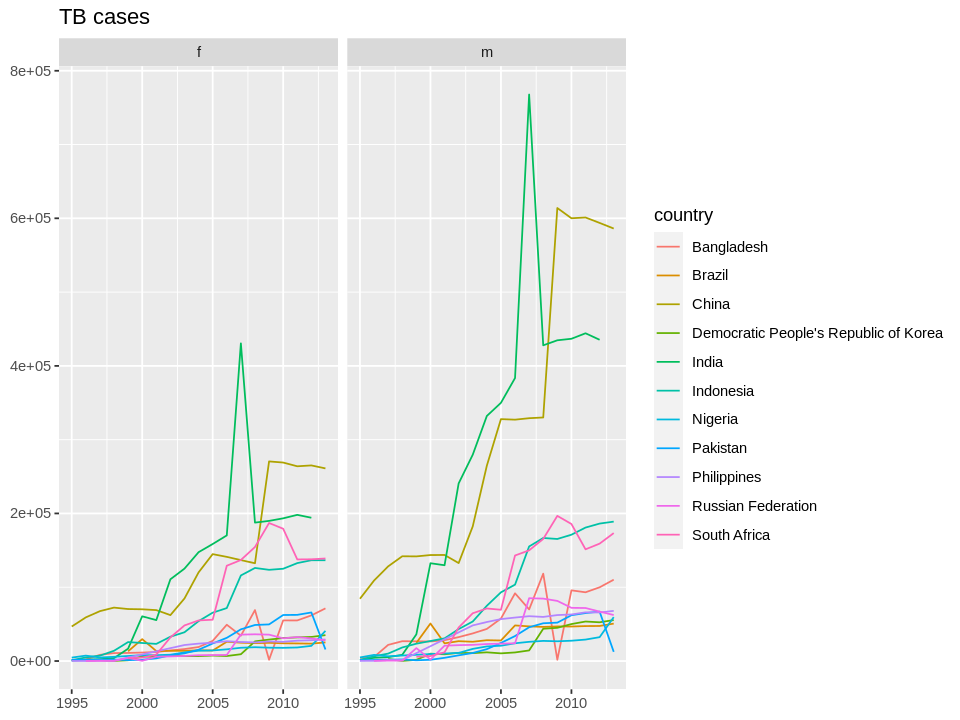

In [20]:
# 4.
who_tidy %>%
  count(country, year, gender, wt = cases) %>%
  filter(n > 0) %>%
  group_by(country) %>%
  filter(max(n) > 50000) %>%

  qplot(year, n, color = country, facets = ~gender, data = ., geom = "line") +
  labs(x = NULL, y = NULL, title = "TB cases")

## Nontidy Data

> Earlier in the chapter, I used the pejorative term “messy” to refer to nontidy data. That’s an oversimplification: there are lots of useful and well-founded data structures that are not tidy data. There are two main reasons to use other data structures:
> - Alternative representations may have substantial performance or space advantages.
> - Specialized fields have evolved their own conventions for storing data that may be quite different to the conventions of tidy data.